In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [10]:
df=pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df.dropna(inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
X = df.drop(['CUST_ID'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
pca.explained_variance_

array([4.6298362 , 3.46403341])

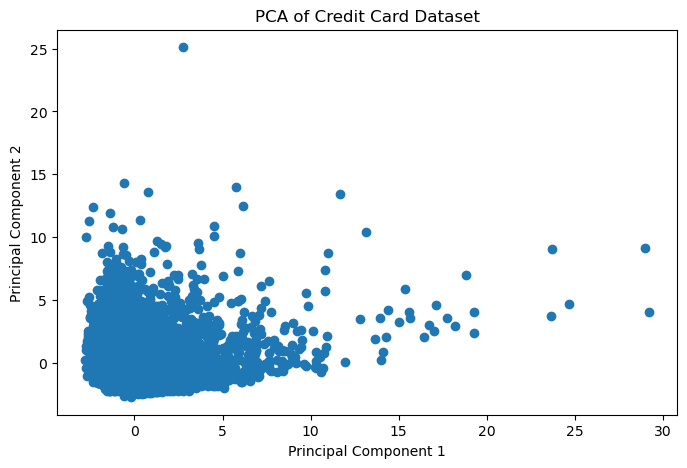

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA of Credit Card Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


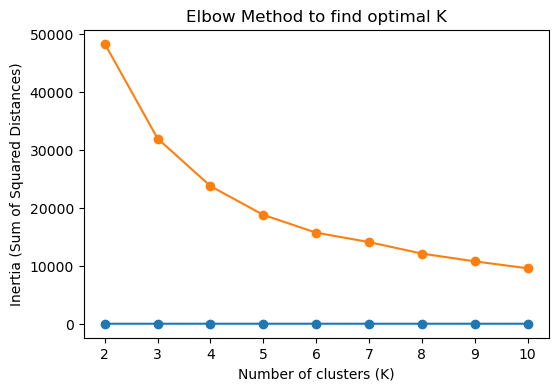

K-Means Silhouette Score: 0.40543478340906064


In [14]:
k_grid = [2,3,4,5,6,7,8,9,10]
results = []
X_scaled=X_pca
for k in k_grid:
    km = KMeans(n_clusters=k, random_state=42)
    labs = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labs)
    results.append((sil, km.inertia_))

plt.figure(figsize=(6,4))
plt.plot(k_grid, results, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method to find optimal K")
plt.show()
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)
k_sil_score = silhouette_score(X_scaled, k_labels)
print(f"K-Means Silhouette Score: {k_sil_score}")

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
results = []
a_grid = [2, 3, 4, 5]
for a in a_grid:
    agglo = AgglomerativeClustering(n_clusters=a)
    labs = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labs)
    results.append(sil)
agglo = AgglomerativeClustering(n_clusters=4)
a_labels = agglo.fit_predict(X_scaled)
a_sil_score = silhouette_score(X_scaled, a_labels)
print(f"Hierarchical Clustering Silhouette Score: {a_sil_score}")

Hierarchical Clustering Silhouette Score: 0.3162272181393183


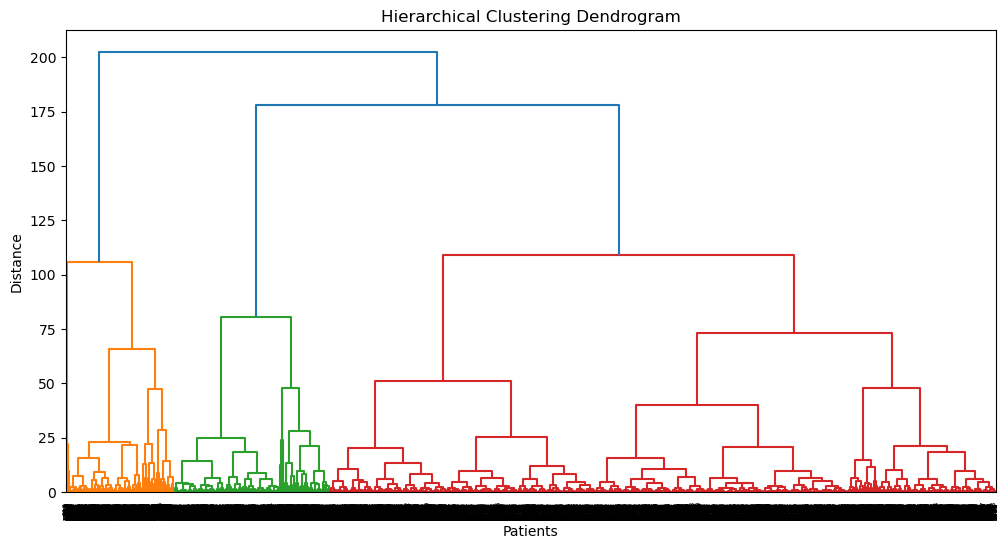

In [16]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()

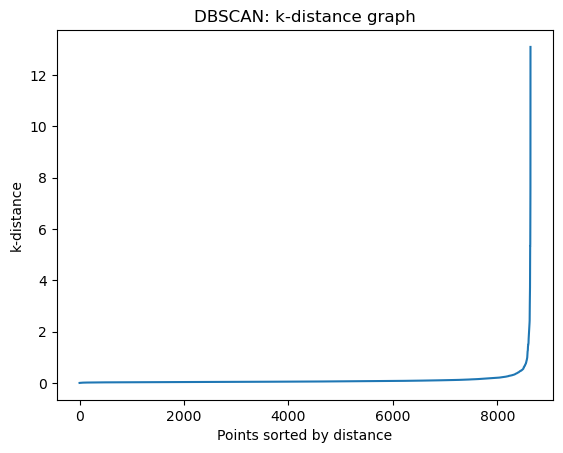

In [17]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors()
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,-1])
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("DBSCAN: k-distance graph")
plt.show()

In [18]:

results = []
dbscan_grid = [(0.8, 3), (0.9, 3),(1.0, 4), (1.5, 5), (2.0, 5)]

for eps, min_samples in dbscan_grid:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labs = dbscan.fit_predict(X_scaled)
    valid = (labs != -1)
    if len(set(labs[valid])) > 1:
        sil = silhouette_score(X_scaled[valid], labs[valid])
    else:
        sil = np.nan
    results.append(sil)
print(results)
dbscan = DBSCAN(eps=2.0, min_samples=5)
d_labels = dbscan.fit_predict(X_scaled)
valid = (d_labels != -1)
if len(set(d_labels[valid])) > 1:
    d_sil_score = silhouette_score(X_scaled[valid], d_labels[valid])
else:
    d_sil_score = -1
print(f"DBSCAN Silhouette Score: {d_sil_score}")



[np.float64(0.663064362671567), np.float64(0.6628183934414329), nan, np.float64(0.8097435766029597), np.float64(0.8029894622754807)]
DBSCAN Silhouette Score: 0.8029894622754807
